Handwritten digit recognition

data collection

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the MINIST dataset

In [ ]:
from keras.datasets.mnist import load_data

In [ ]:
## load_data
(train_digits,train_labels),(test_digits,test_labels) = load_data()
print(train_digits.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


There are 60000 images in the training data. Each image size is 28*28

In [ ]:
print(test_digits.shape)

(10000, 28, 28)


There are 10 classes from class 0 to 9

In [ ]:
print(train_labels.shape)

(60000,)


Class wise images count

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
import pandas as pd
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

Image count for each label in test data

In [ ]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

EDA

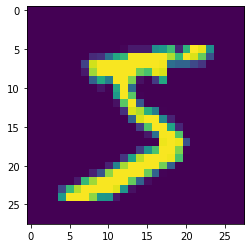

In [ ]:
plt.imshow(train_digits[0])

Text(0.5, 1.0, 'Digit 5')

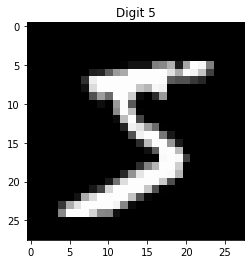

In [ ]:
plt.imshow(train_digits[0],cmap='gray')
plt.title("Digit "+ str(train_labels[0]))

In [ ]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [ ]:
28*28

784

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

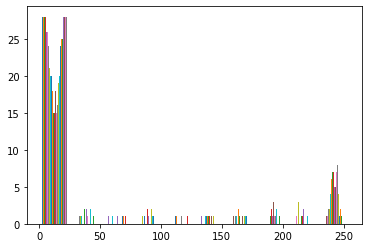

In [ ]:
plt.hist(train_digits[0])

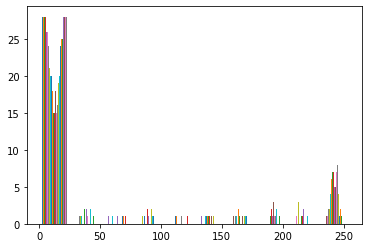

In [ ]:
plt.hist(train_digits[0])
plt.show()

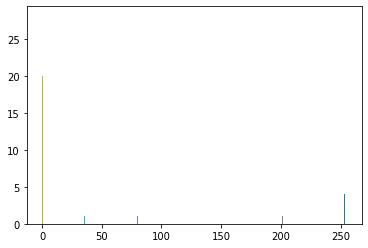

In [ ]:
plt.hist(train_digits[0],bins=225)
plt.show()

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

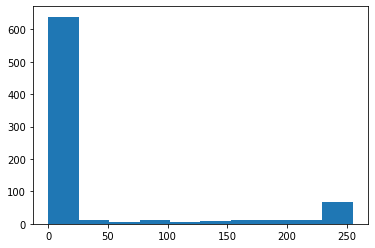

In [ ]:
plt.hist(train_digits[0].flat)

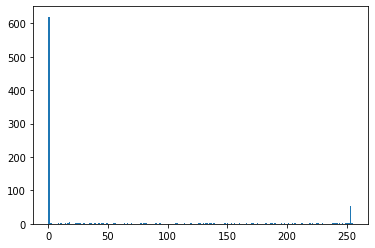

In [ ]:
plt.hist(train_digits[0].flat,bins=225)
plt.show()

(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

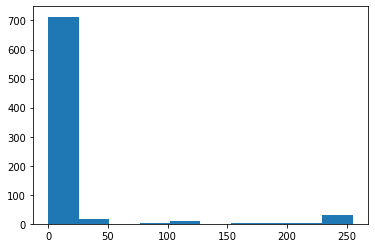

In [ ]:
#pixel distribution for digit 1
plt.hist(train_digits[14].flat)

In [ ]:
train_labels[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

In [ ]:
samples = np.random.randint(train_digits.shape[0],size=16)
samples

array([33304,  5035, 54780, 39948, 25763, 41966, 19664, 21144, 49348,
       46025, 33194,   885, 17983, 40064, 57286, 35498])

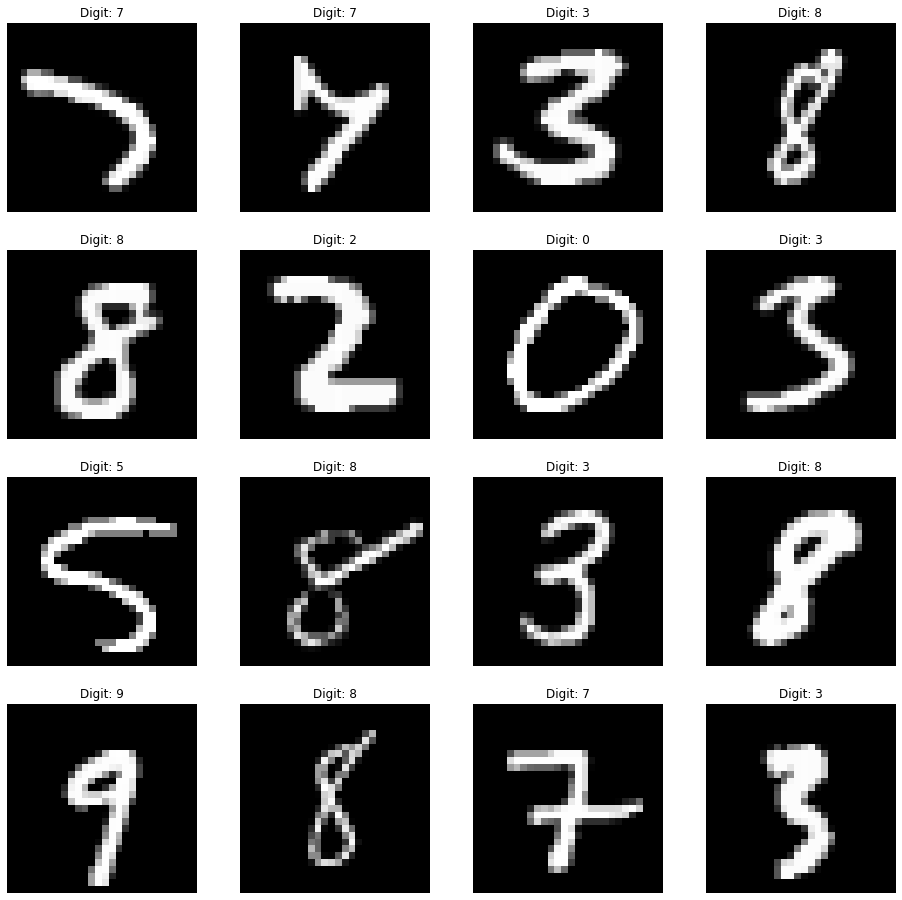

In [ ]:
plt.figure(figsize=(16,16))
j = 1
for i in samples:
   plt.subplot(4,4,j)
   plt.imshow(train_digits[i],cmap='gray')
   plt.title("Digit: "+str(train_labels[i]))
   plt.axis('off')
   j += 1

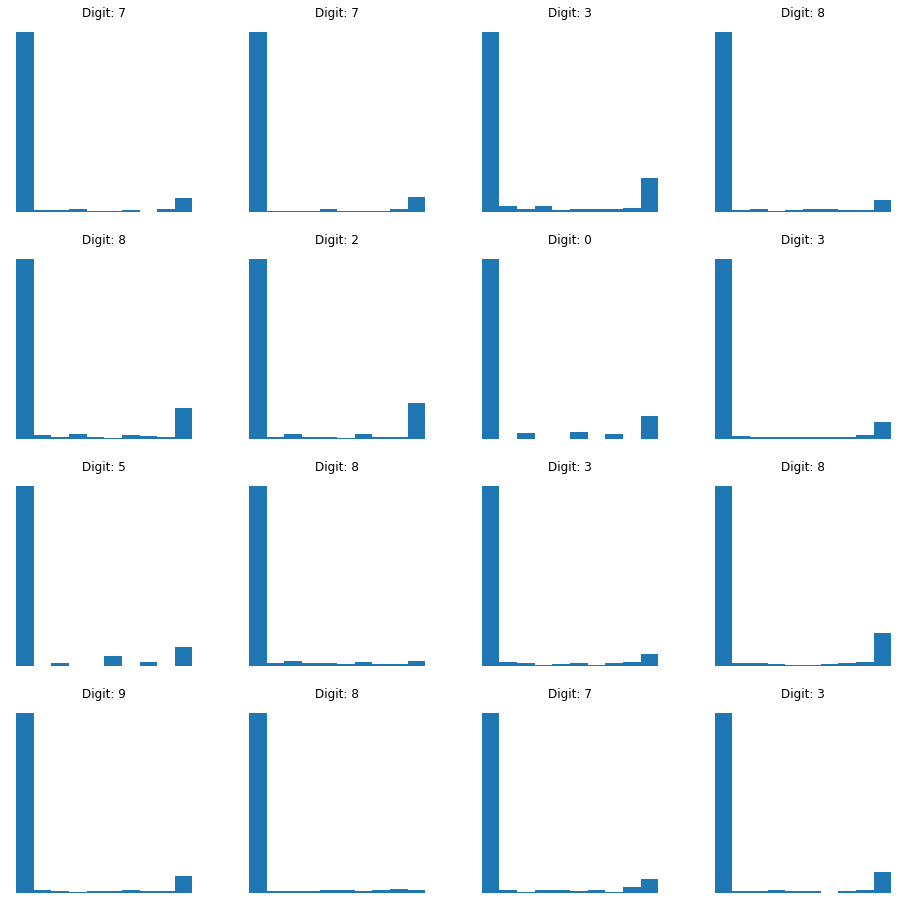

In [ ]:
plt.figure(figsize=(16,16))
j = 1
for i in samples:
   plt.subplot(4,4,j)
   plt.hist(train_digits[i].flat)
   plt.title("Digit: "+str(train_labels[i]))
   plt.axis('off')
   j += 1

### Preprocessing

Scaling

In [ ]:
## Pixel values are from 0 to 255
train_digits_sc = train_digits/225.0
test_digits_sc = test_digits/255.0

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels_cat = to_categorical(train_labels)

In [ ]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_labels_cat = to_categorical(train_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

### Split the train data to train and validation

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)


### Build the Train the model

Build the model
We need to take 1d array as input for Dense layer
How many hidden layers you want to add here?
How many neurons in each hidden layer?
What is activation function for the hidden layers?
How many neurons we should take in the output layer?
What is the activation function for the output layer?

In [ ]:
#import the methods required
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [ ]:
784*128+128

100480

In [ ]:
##We are creating the base model
model = Sequential()
#First layer we need to mention the input shape
model.add(Flatten(input_shape=(28,28)))
#784 pixel values as input to this dense. 128 neurons in the layers
model.add(Dense(128,activation='relu')) #784*128+128
model.add(Dense(128,activation='relu')) # 128*128+128
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer there are 10 classes so use 10 neurons
model.add(Dense(10,activation='softmax')) #relu--> x
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

### Compile the model
What is the loss function?
What is the optimizer?
What are the metrics?


In [ ]:
model.compile(optimizer = 'adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

### Training the model

In [ ]:
history = model.fit(x=X_train,y=y_train,epochs=10,\
                    validation_data=(X_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 123us/step - loss: 0.2552 - accuracy: 0.9216 - val_loss: 0.1368 - val_accuracy: 0.9587
Epoch 2/10
54000/54000 [==============================] - 7s 133us/step - loss: 0.1095 - accuracy: 0.9668 - val_loss: 0.1184 - val_accuracy: 0.9692
Epoch 3/10
54000/54000 [==============================] - 7s 125us/step - loss: 0.0816 - accuracy: 0.9752 - val_loss: 0.1352 - val_accuracy: 0.9647
Epoch 4/10
54000/54000 [==============================] - 6s 119us/step - loss: 0.0651 - accuracy: 0.9802 - val_loss: 0.1170 - val_accuracy: 0.9693
Epoch 5/10
54000/54000 [==============================] - 6s 119us/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.1093 - val_accuracy: 0.9723
Epoch 6/10
54000/54000 [==============================] - 6s 118us/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0928 - val_accuracy: 0.9777
Epoch 7/10
54000/54000 [==============================] - 6s 11

###Evaluating the model

In [ ]:
model.evaluate(test_digits_sc,test_labels_cat)

In [ ]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [ ]:
test_labels[0]

7

In [ ]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[9.3113174e-17, 1.1441922e-07, 2.9619612e-11, 3.6393086e-11,
        2.8492768e-12, 5.0220848e-16, 3.1734678e-19, 9.9999976e-01,
        1.7073339e-11, 1.0489869e-07]], dtype=float32)

In [ ]:
model.predict(test_digits_sc[:10])

array([[9.31131738e-17, 1.14419002e-07, 2.96196123e-11, 3.63930171e-11,
        2.84928223e-12, 5.02208481e-16, 3.17346782e-19, 9.99999762e-01,
        1.70733393e-11, 1.04898696e-07],
       [2.03568187e-11, 1.77157435e-08, 9.99999881e-01, 2.32471855e-08,
        1.79801421e-12, 1.53731167e-10, 5.34894316e-11, 6.14458102e-08,
        1.90289048e-10, 6.98891574e-13],
       [2.22777310e-15, 9.99999881e-01, 2.03409525e-10, 8.78377232e-13,
        2.34125608e-10, 1.54942574e-13, 5.05016862e-10, 2.56972204e-08,
        7.33608374e-08, 1.00005486e-12],
       [9.99982715e-01, 2.00615110e-12, 6.88973387e-06, 3.91467552e-08,
        2.71394480e-08, 1.53450742e-07, 2.26410364e-07, 2.19248633e-07,
        1.15938947e-08, 9.75603598e-06],
       [5.30832434e-10, 5.03150886e-06, 3.02272809e-07, 2.10158529e-10,
        9.99986887e-01, 5.92929510e-08, 1.11844251e-07, 7.06213029e-07,
        1.35050424e-08, 6.94332311e-06],
       [9.27069785e-18, 1.00000000e+00, 9.97722955e-13, 4.80307322e-15,
   

In [ ]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [ ]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[9.3113174e-17, 1.1441922e-07, 2.9619612e-11, 3.6393086e-11,
        2.8492768e-12, 5.0220848e-16, 3.1734678e-19, 9.9999976e-01,
        1.7073339e-11, 1.0489869e-07]], dtype=float32)

In [ ]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [ ]:
history.history

{'accuracy': [0.92164814,
  0.9668148,
  0.9751667,
  0.9801667,
  0.9831852,
  0.98605555,
  0.9881296,
  0.9896296,
  0.99024075,
  0.99175924],
 'loss': [0.25523377766956884,
  0.10945029028201544,
  0.08159579943565445,
  0.06512319510240384,
  0.05400232919612986,
  0.0441910921011672,
  0.03794891825168937,
  0.03328096146150535,
  0.03132882403646808,
  0.02821018659510419],
 'val_accuracy': [0.9586666822433472,
  0.9691666960716248,
  0.9646666646003723,
  0.9693333506584167,
  0.9723333120346069,
  0.9776666760444641,
  0.9714999794960022,
  0.9741666913032532,
  0.9710000157356262,
  0.9764999747276306],
 'val_loss': [0.13684211080272993,
  0.11836763525754214,
  0.13521425086197753,
  0.11702054460595052,
  0.10932559704532226,
  0.09276430947271486,
  0.11347808601753787,
  0.10788735196576454,
  0.14000715057342314,
  0.12088651228509843]}

In [ ]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

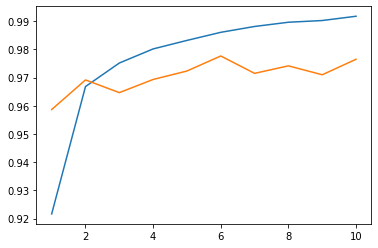

In [ ]:
 plt.plot(range(1,11),history.history['accuracy'])
 plt.plot(range(1,11),history.history['val_accuracy'])